# ネットワークの可視化の重要性と注意点
グラフ理論によるネットワークの可視化は、ネットワーク全体の構造やパターンを視覚的に理解するのに非常に有効です。ノード（点）間の関係を直感的に把握できるため、ネットワーク内のクラスター（密なグループ）や重要なノード（中心的な点）を簡単に識別できます。これにより、異常なパターンや構造の変化を早期に発見することが可能です。

また、ネットワークの可視化は専門的な知識がない人々にも情報を分かりやすく伝える手段としてコミュニケーションを円滑にします。データ分析の面でもノードの重要度やネットワークの密度などを視覚的に確認することで、データの特性を深く理解し、新しい発見を得ることができます。

しかし、ネットワークを可視化する際にはいくつかの重要な注意点があります。まず、隣接している頂点（ノード）同士を近くに配置することで、ノード間の関係性を分かりやすくします。ただし、頂点があまりにも近づき過ぎないようにすることも重要です。これは、視覚的な混乱を避けるためです。次に、辺（エッジ）の長さをできるだけ一定に保つことで均一で見やすいグラフを作成します。また、対称性を示すことも美しいグラフを作成するために重要です。与えられたスペースに頂点を一様に分布させることでグラフ全体がバランスよく配置され見やすくなります。

さらに、辺の交差を最小限に抑えることでグラフの読みやすさが向上します。辺が折れ曲がらないようにすることで視覚的にスムーズなグラフを作成することができます。これらの注意点を考慮することで、効果的で見やすいネットワークの可視化が可能になります。

また、具体的な可視化手法として、力学モデル（Force-Directed Model）やスペクトルレイアウト（Spectral Layout）などがあり、これらは頂点とエッジの配置に関する最適化を行います。力学モデルでは、頂点間の引力と反発力を計算して、自然な配置を実現します。スペクトルレイアウトでは、グラフのラプラシアン行列を用いて、頂点を効率的に配置します。これらの手法を用いることで、視覚的にバランスの取れたグラフを作成することが可能です。

総じて、これらの注意点と手法を踏まえることで、グラフ理論によるネットワークの可視化は、データの特性を深く理解し、効果的なコミュニケーションを促進するための強力なツールとなります。

## その前に･･･
GMLファイルにはノードとエッジ以外にもグラフ全体に関するメタデータや属性を含むことができます。GMLは柔軟な形式であり、ユーザー定義の属性を含めることが可能です。<br>

まずはlesmis.gmlにある、グラフ全体のメタデータを確認してみましょう。<br>

ノードの数77、エッジ数254と、value･･･?<br>

重みを示す属性は通常 'weight' というキーで表されますが、レ・ミゼラブルgmlの'value'は**キャラクターの関係性の強さ**を表す「重み」として扱われます。
具体的には'value'という属性はエッジ上の共起の回数、すなわち再出現回数を示し、それをエッジの重みとしています。

In [7]:
import networkx as nx

# GMLファイルのパスを指定
file_path = r"D:\Python\NetworkX\lesmis\lesmis.gml"

# GMLファイルを読み込む
graph = nx.read_gml(file_path)

# グラフ全体のメタデータを表示する
print("Graph metadata:")
for key, value in graph.graph.items():
    print(f"{key}: {value}")

# ノードの詳細を表示する
print("\nNodes:")
for node, data in graph.nodes(data=True):
    print(f"Node {node}: {data}")

# エッジの詳細を表示する
print("\nEdges:")
for u, v, data in graph.edges(data=True):
    print(f"Edge from {u} to {v}: {data}")


Graph metadata:

Nodes:
Node Myriel: {}
Node Napoleon: {}
Node MlleBaptistine: {}
Node MmeMagloire: {}
Node CountessDeLo: {}
Node Geborand: {}
Node Champtercier: {}
Node Cravatte: {}
Node Count: {}
Node OldMan: {}
Node Labarre: {}
Node Valjean: {}
Node Marguerite: {}
Node MmeDeR: {}
Node Isabeau: {}
Node Gervais: {}
Node Tholomyes: {}
Node Listolier: {}
Node Fameuil: {}
Node Blacheville: {}
Node Favourite: {}
Node Dahlia: {}
Node Zephine: {}
Node Fantine: {}
Node MmeThenardier: {}
Node Thenardier: {}
Node Cosette: {}
Node Javert: {}
Node Fauchelevent: {}
Node Bamatabois: {}
Node Perpetue: {}
Node Simplice: {}
Node Scaufflaire: {}
Node Woman1: {}
Node Judge: {}
Node Champmathieu: {}
Node Brevet: {}
Node Chenildieu: {}
Node Cochepaille: {}
Node Pontmercy: {}
Node Boulatruelle: {}
Node Eponine: {}
Node Anzelma: {}
Node Woman2: {}
Node MotherInnocent: {}
Node Gribier: {}
Node Jondrette: {}
Node MmeBurgon: {}
Node Gavroche: {}
Node Gillenormand: {}
Node Magnon: {}
Node MlleGillenormand: {}


このスクリプトは、小説『レ・ミゼラブル』の登場人物の関係をグラフとして表し、そのネットワークを解析するためのツールです。
以下では、スクリプトの各部分を詳しく説明します。

**コミュニティ検出の方法**<br>
コミュニティ検出はネットワークを意味のあるグループに分割する手法です。このスクリプトでは**Girvan-Newmanアルゴリズム**が使われています。このアルゴリズムは、グラフを分割し、その分割がネットワーク全体の構造を最もよく表すように評価します。『レ・ミゼラブル』の場合、例えば登場人物の関係性や所属するグループ（革命家、市民、警察など）に基づいて、彼らの社会的接続を理解するのに役立ちます。モジュラリティという指標を最大化するような分割を見つけることで、登場人物のグループ化がどの程度意味を持つかを評価します。

**中心性の理解**<br>
中心性はネットワーク内で各ノードがどれだけ重要かを測る指標です。このスクリプトでは、各コミュニティ内でのノードの中心性を次数中心性で評価しています。次数中心性は、直接的な関係性や影響力を持つノードを特定するのに役立ちます。物語の中心的な登場人物が、どのグループでどれだけ影響力を持っているかを理解する手助けをします。

**可視化の重要性**<br>
ネットワークの可視化は、その構造や特性を視覚的に理解するための不可欠な手段です。このスクリプトでは、Kamada-Kawaiレイアウトを使用してネットワークを可視化しています。このレイアウトは、ノード間の距離を最小化することで、登場人物の間の関係性やグループの形成を見やすく配置します。例えば、革命家のグループやジャヴェールと彼の追跡対象の関係を、どのように視覚的に把握するかを示します。

コミュニティ数: 11
最大モジュラリティ: 0.5380680761361523 (ステップ 10)
全モジュラリティシーケンス: [0.07464039928079841, 0.2604082708165416, 0.2660502821005642, 0.4154705809411618, 0.4587156674313348, 0.45545291090582174, 0.45366265732531463, 0.45186465372930745, 0.4524226548453097, 0.5380680761361523, 0.5347820695641391, 0.531488312976626, 0.5281868063736127, 0.5248775497550996, 0.5233585467170935, 0.5195920391840784, 0.5180420360840722, 0.5151590303180607, 0.5121287742575485, 0.5027047554095109, 0.4989304978609957, 0.4955824911649823, 0.49266848533697066, 0.4888864777729556, 0.48609647219294444, 0.4823067146134293, 0.47582770165540333, 0.47203019406038815, 0.46822493644987295, 0.458762167524335, 0.4549491598983198, 0.4514461528923058, 0.44758664517329033, 0.44378913757827515, 0.43997612995225993, 0.420988591977184, 0.4084335668671338, 0.3949717899435799, 0.38000651001302005, 0.3594224688449377, 0.3520134540269081, 0.3481461962923926, 0.33512617025234054, 0.3115428730857462, 0.2906333312666625, 0.2732810465620931, 0

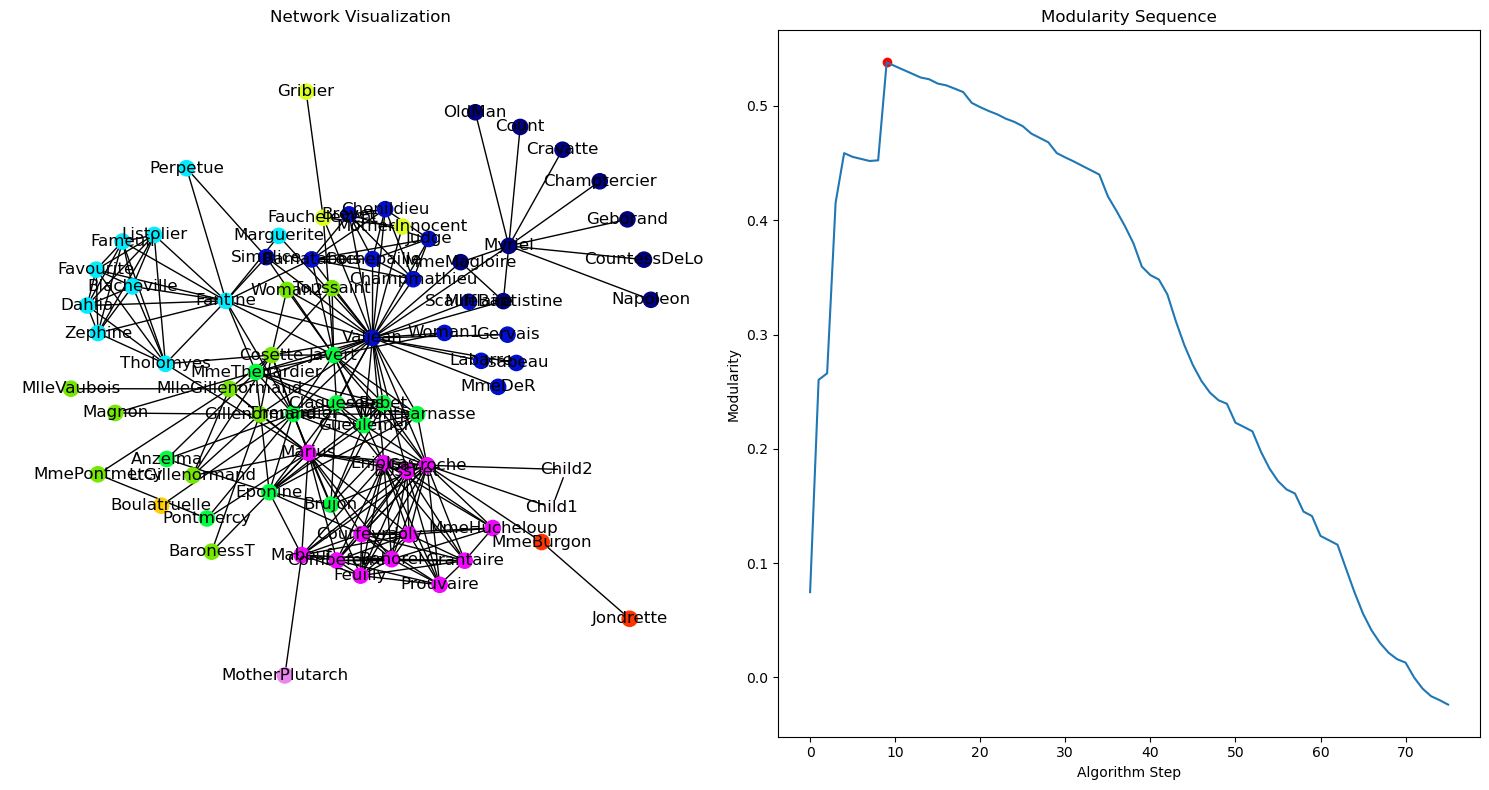

コミュニティ 1: {'OldMan', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'Geborand', 'Count', 'Cravatte', 'CountessDeLo', 'Champtercier', 'Napoleon'}
中心性:
OldMan: 0.1111
Myriel: 1.0000
MmeMagloire: 0.2222
Geborand: 0.1111
CountessDeLo: 0.1111
Count: 0.1111
Cravatte: 0.1111
MlleBaptistine: 0.2222
Champtercier: 0.1111
Napoleon: 0.1111

コミュニティ 2: {'Chenildieu', 'Valjean', 'Judge', 'Scaufflaire', 'Gervais', 'Bamatabois', 'Champmathieu', 'Cochepaille', 'MmeDeR', 'Isabeau', 'Brevet', 'Labarre', 'Woman1', 'Simplice'}
中心性:
Chenildieu: 0.4615
Valjean: 1.0000
Judge: 0.4615
Scaufflaire: 0.0769
Gervais: 0.0769
Bamatabois: 0.4615
Champmathieu: 0.4615
Cochepaille: 0.4615
MmeDeR: 0.0769
Isabeau: 0.0769
Brevet: 0.4615
Labarre: 0.0769
Woman1: 0.0769
Simplice: 0.0769

コミュニティ 3: {'Fameuil', 'Blacheville', 'Favourite', 'Zephine', 'Marguerite', 'Listolier', 'Perpetue', 'Tholomyes', 'Fantine', 'Dahlia'}
中心性:
Fameuil: 0.7778
Zephine: 0.7778
Favourite: 0.7778
Blacheville: 0.7778
Marguerite: 0.1111
Listolier: 0.7778
Pe

In [12]:
# 必要なライブラリをインポート
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community, centrality
import pandas as pd

# GMLファイルのパス
gml_file = r'D:\Python\NetworkX\lesmis\lesmis.gml'

# GML形式のファイルを読み込み
G = nx.read_gml(gml_file)

# Girvan-Newmanアルゴリズムでコミュニティを抽出
communities_generator = community.girvan_newman(G)

# Girvan-Newmanアルゴリズムを適用して最適なコミュニティを見つける
partition_sequence = list(communities_generator)
modularity_sequence = [community.modularity(G, p) for p in partition_sequence]

# 最大モジュラリティのステップを見つける
max_modularity = max(modularity_sequence)
max_step = modularity_sequence.index(max_modularity) + 1  # インデックスを1から始まるステップに修正

# 最大モジュラリティのコミュニティを取得
optimal_partition = partition_sequence[max_step - 1]

# コミュニティ数を出力
num_communities = len(optimal_partition)
print(f"コミュニティ数: {num_communities}")

# 各コミュニティの中心性を計算
centrality_measures = {}
for idx, community in enumerate(optimal_partition):
    subgraph = G.subgraph(community)
    # 中心性を計算（ここでは次数中心性を使用）
    degree_centrality = nx.degree_centrality(subgraph)
    centrality_measures[f"Community {idx + 1}"] = degree_centrality

# コンソールに重要なポイントを出力
print(f"最大モジュラリティ: {max_modularity} (ステップ {max_step})")
print(f"全モジュラリティシーケンス: {modularity_sequence}")

# コミュニティ番号をノード属性に設定してネットワークを描画
carac = pd.DataFrame({'ID': G.nodes(), 'myvalue': [0] * len(G.nodes())})
for idx, community in enumerate(optimal_partition):
    for node in community:
        carac.loc[carac.ID == node, 'myvalue'] = idx

# レイアウトの設定（ノード間の距離を少し広げる）
pos = nx.kamada_kawai_layout(G)

# 可視化
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# ネットワークの描画
ax[0].set_title('Network Visualization')
nx.draw(G, pos, node_color=carac['myvalue'], node_size=120, with_labels=True, cmap=plt.cm.gist_ncar, ax=ax[0])

# モジュラリティシーケンスの描画
ax[1].set_title('Modularity Sequence')
ax[1].plot(modularity_sequence)
ax[1].set_ylabel('Modularity')
ax[1].set_xlabel('Algorithm Step')
ax[1].scatter(max_step - 1, max_modularity, color='red')  # 最大モジュラリティポイントを強調表示

plt.tight_layout()
plt.show()

# 各コミュニティのノードをリスト表示
for idx, community in enumerate(optimal_partition):
    print(f"コミュニティ {idx + 1}: {community}")
    print(f"中心性:")
    for node, centrality_value in centrality_measures[f"Community {idx + 1}"].items():
        print(f"{node}: {centrality_value:.4f}")
    print()


In [ ]:
pip install networkx numpy matplotlib scikit-learn

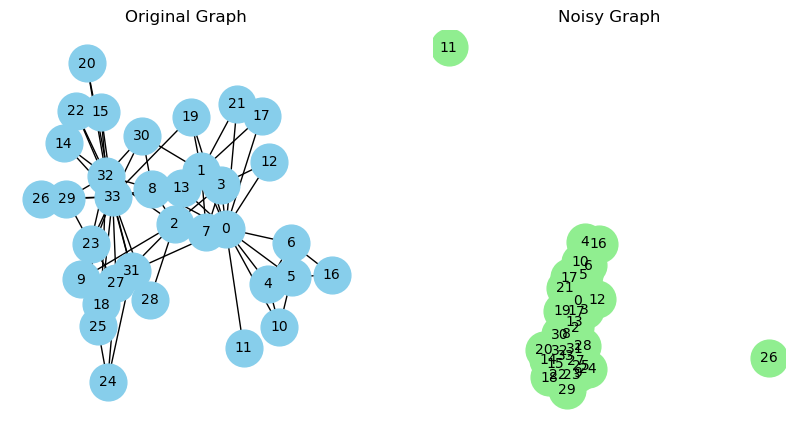

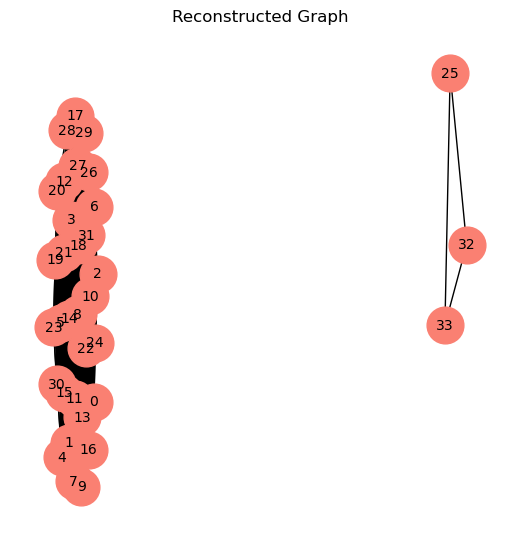

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 468
Common Edges between Original and Reconstructed: 48
Precision of Reconstruction: 0.10256410256410256
Recall of Reconstruction: 0.6153846153846154


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# ザカリーの空手クラブのデータセットを読み込む
G = nx.karate_club_graph()

# グラフにノイズを追加する
def add_noise_to_graph(G, noise_level=0.1):
    noisy_G = G.copy()
    edges = list(G.edges())
    np.random.shuffle(edges)
    num_noisy_edges = int(noise_level * len(edges))
    edges_to_remove = edges[:num_noisy_edges]
    for edge in edges_to_remove:
        noisy_G.remove_edge(*edge)
    return noisy_G

# ノイズを追加したグラフを生成
noisy_G = add_noise_to_graph(G, noise_level=0.1)

# ノイズを追加したグラフの描画
plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=10)
plt.title('Original Graph')

plt.subplot(122)
nx.draw(noisy_G, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', font_size=10)
plt.title('Noisy Graph')

plt.show()

# ノイズのあるグラフを再構築する
def reconstruct_graph(noisy_G):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    dist_matrix = pairwise_distances(adj_matrix, metric='euclidean')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage='complete', n_clusters=2)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j]:
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 再構築したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G)

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))


再構築アルゴリズムの精度と再現率を改善するためにアルゴリズムを修正

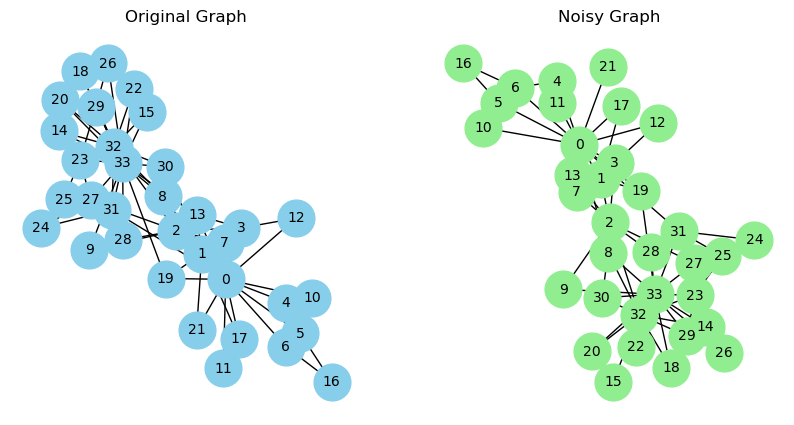

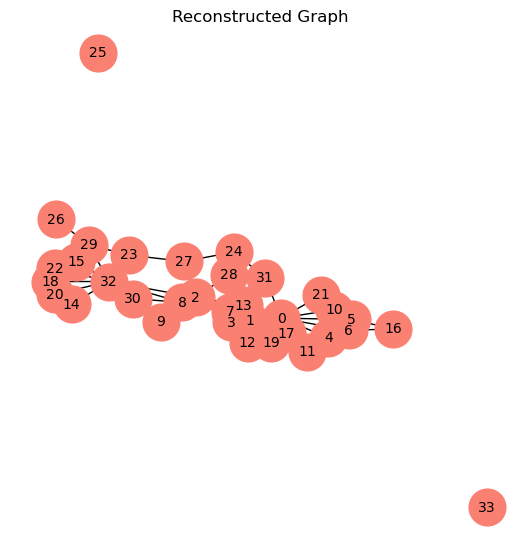

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 53
Common Edges between Original and Reconstructed: 53
Precision of Reconstruction: 1.0
Recall of Reconstruction: 0.6794871794871795


In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# ザカリーの空手クラブのデータセットを読み込む
G = nx.karate_club_graph()

# グラフにノイズを追加する
def add_noise_to_graph(G, noise_level=0.1):
    noisy_G = G.copy()
    edges = list(G.edges())
    np.random.shuffle(edges)
    num_noisy_edges = int(noise_level * len(edges))
    edges_to_remove = edges[:num_noisy_edges]
    for edge in edges_to_remove:
        noisy_G.remove_edge(*edge)
    return noisy_G

# ノイズを追加したグラフを生成
noisy_G = add_noise_to_graph(G, noise_level=0.1)

# ノイズを追加したグラフの描画
plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=10)
plt.title('Original Graph')

plt.subplot(122)
nx.draw(noisy_G, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', font_size=10)
plt.title('Noisy Graph')

plt.show()

# ノイズのあるグラフを再構築する
def reconstruct_graph(noisy_G):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    # コサイン距離を使用して距離行列を計算
    dist_matrix = pairwise_distances(adj_matrix, metric='cosine')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage='complete', n_clusters=2)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    # 同じクラスタ内のノード間のみエッジを追加
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j] and noisy_G.has_edge(i, j):
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 再構築したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G)

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))


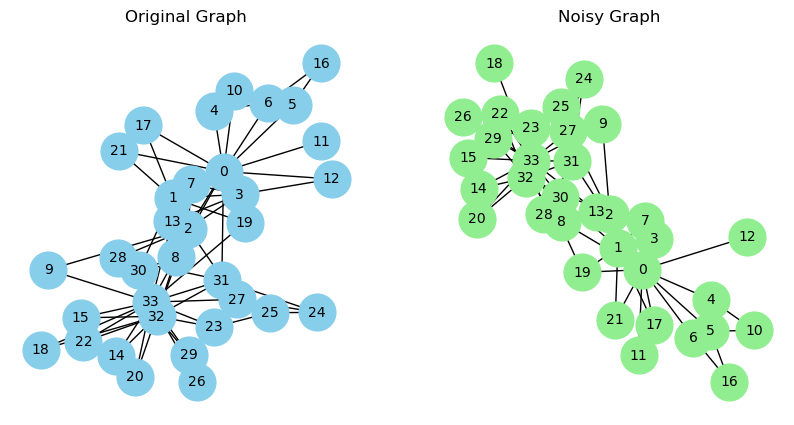

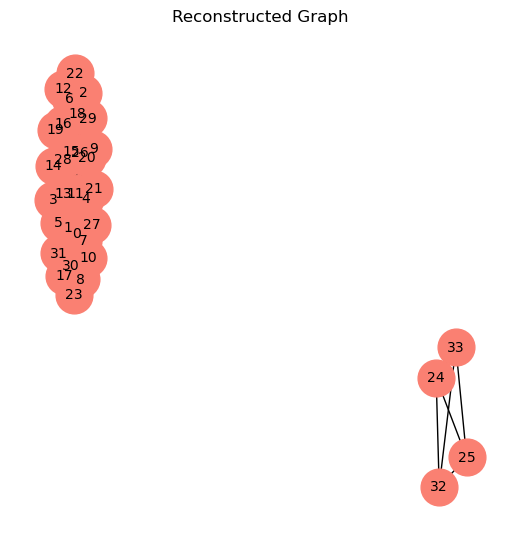

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 441
Common Edges between Original and Reconstructed: 47
Precision of Reconstruction: 0.10657596371882086
Recall of Reconstruction: 0.6025641025641025


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# ザカリーの空手クラブのデータセットを読み込む
G = nx.karate_club_graph()

# グラフにノイズを追加する
def add_noise_to_graph(G, noise_level=0.1):
    noisy_G = G.copy()
    edges = list(G.edges())
    np.random.shuffle(edges)
    num_noisy_edges = int(noise_level * len(edges))
    edges_to_remove = edges[:num_noisy_edges]
    for edge in edges_to_remove:
        noisy_G.remove_edge(*edge)
    return noisy_G

# ノイズを追加したグラフを生成
noisy_G = add_noise_to_graph(G, noise_level=0.1)

# ノイズを追加したグラフの描画
plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=10)
plt.title('Original Graph')

plt.subplot(122)
nx.draw(noisy_G, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', font_size=10)
plt.title('Noisy Graph')

plt.show()

# ノイズのあるグラフを再構築する
def reconstruct_graph(noisy_G, n_clusters=2):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    # コサイン距離を使用して距離行列を計算
    dist_matrix = pairwise_distances(adj_matrix, metric='cosine')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage='complete', n_clusters=n_clusters)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    # 同じクラスタ内のノード間のみエッジを追加
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j] and noisy_G.has_edge(i, j):
                reconstructed_G.add_edge(i, j)
            elif labels[i] == labels[j]:
                # 同じクラスタ内のノード間にエッジを追加
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 再構築したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G, n_clusters=2)

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))


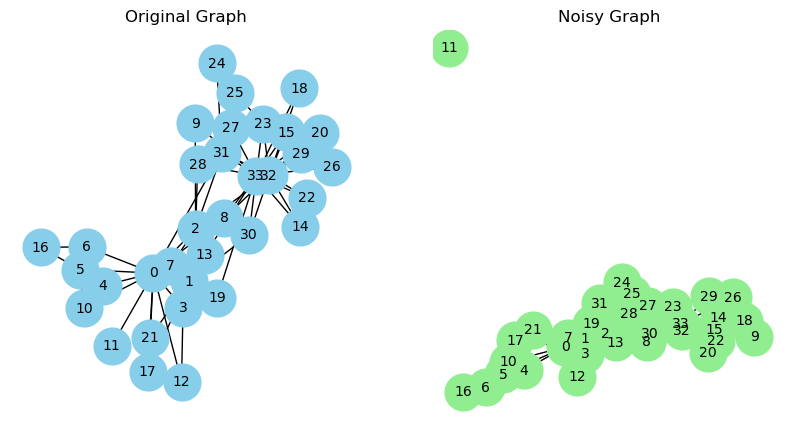

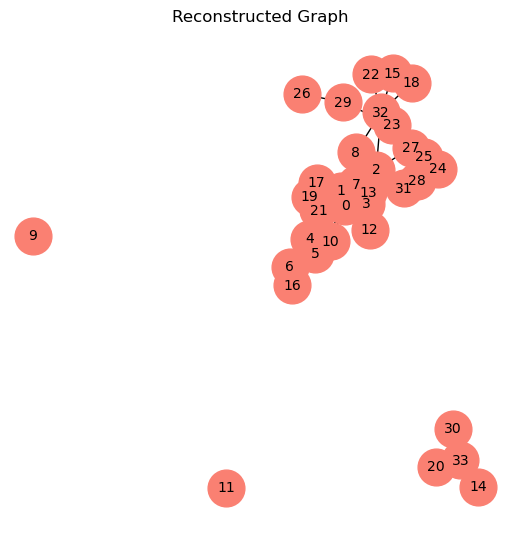

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 53
Common Edges between Original and Reconstructed: 53
Precision of Reconstruction: 1.0
Recall of Reconstruction: 0.6794871794871795


In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# ザカリーの空手クラブのデータセットを読み込む
G = nx.karate_club_graph()

# グラフにノイズを追加する
def add_noise_to_graph(G, noise_level=0.1):
    noisy_G = G.copy()
    edges = list(G.edges())
    np.random.shuffle(edges)
    num_noisy_edges = int(noise_level * len(edges))
    edges_to_remove = edges[:num_noisy_edges]
    for edge in edges_to_remove:
        noisy_G.remove_edge(*edge)
    return noisy_G

# ノイズを追加したグラフを生成
noisy_G = add_noise_to_graph(G, noise_level=0.1)

# ノイズを追加したグラフの描画
plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=10)
plt.title('Original Graph')

plt.subplot(122)
nx.draw(noisy_G, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', font_size=10)
plt.title('Noisy Graph')

plt.show()

# ノイズのあるグラフを再構築する
def reconstruct_graph(noisy_G, n_clusters=2):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    # コサイン距離を使用して距離行列を計算
    dist_matrix = pairwise_distances(adj_matrix, metric='cosine')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage='complete', n_clusters=n_clusters)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    # 同じクラスタ内のノード間のみエッジを追加
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j] and noisy_G.has_edge(i, j):
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 再構築したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G, n_clusters=2)

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))


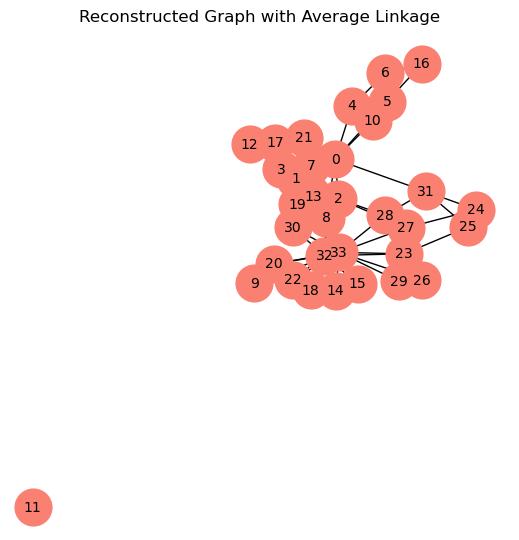

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 71
Common Edges between Original and Reconstructed: 71
Precision of Reconstruction: 1.0
Recall of Reconstruction: 0.9102564102564102


In [8]:
def reconstruct_graph(noisy_G, n_clusters=2, linkage_method='average'):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    # コサイン距離を使用して距離行列を計算
    dist_matrix = pairwise_distances(adj_matrix, metric='cosine')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage=linkage_method, n_clusters=n_clusters)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    # 同じクラスタ内のノード間のみエッジを追加
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j] and noisy_G.has_edge(i, j):
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 修正したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G, n_clusters=2, linkage_method='average')

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph with Average Linkage')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))


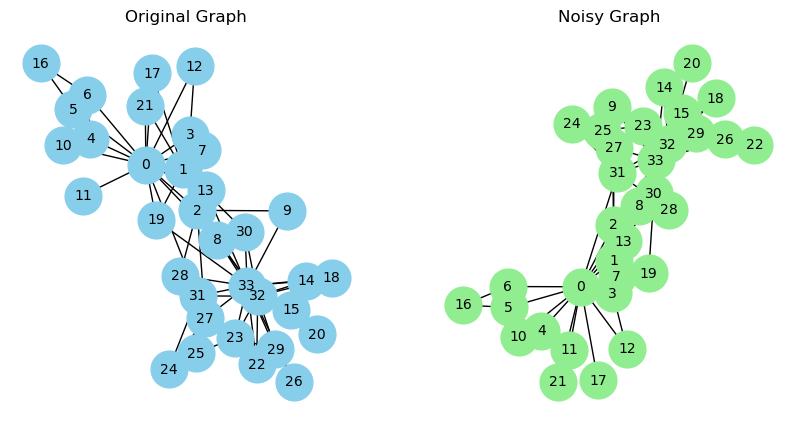

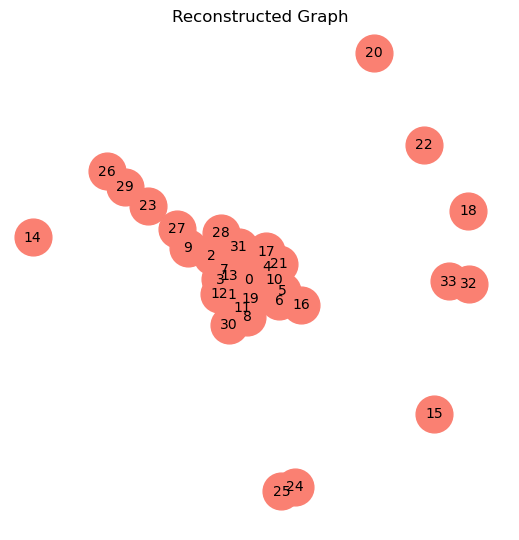

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 42
Common Edges between Original and Reconstructed: 42
Precision of Reconstruction: 1.0
Recall of Reconstruction: 0.5384615384615384


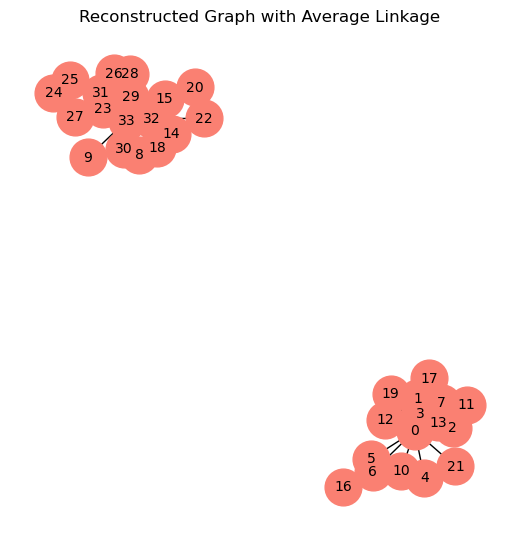

Original Graph Edges: 78
Noisy Graph Edges: 71
Reconstructed Graph Edges: 62
Common Edges between Original and Reconstructed: 62
Precision of Reconstruction: 1.0
Recall of Reconstruction: 0.7948717948717948


In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

# ザカリーの空手クラブのデータセットを読み込む
G = nx.karate_club_graph()

# グラフにノイズを追加する
def add_noise_to_graph(G, noise_level=0.1):
    noisy_G = G.copy()
    edges = list(G.edges())
    np.random.shuffle(edges)
    num_noisy_edges = int(noise_level * len(edges))
    edges_to_remove = edges[:num_noisy_edges]
    for edge in edges_to_remove:
        noisy_G.remove_edge(*edge)
    return noisy_G

# ノイズを追加したグラフを生成
noisy_G = add_noise_to_graph(G, noise_level=0.1)

# ノイズを追加したグラフの描画
plt.figure(figsize=(10, 5))

plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', font_size=10)
plt.title('Original Graph')

plt.subplot(122)
nx.draw(noisy_G, with_labels=True, node_color='lightgreen', node_size=700, edge_color='k', font_size=10)
plt.title('Noisy Graph')

plt.show()

# ノイズのあるグラフを再構築する
def reconstruct_graph(noisy_G, n_clusters=2):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    # コサイン距離を使用して距離行列を計算
    dist_matrix = pairwise_distances(adj_matrix, metric='cosine')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage='complete', n_clusters=n_clusters)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    # 同じクラスタ内のノード間のみエッジを追加
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j] and noisy_G.has_edge(i, j):
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 再構築したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G, n_clusters=2)

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))

def reconstruct_graph(noisy_G, n_clusters=2, linkage_method='average'):
    adj_matrix = nx.adjacency_matrix(noisy_G).todense()
    # コサイン距離を使用して距離行列を計算
    dist_matrix = pairwise_distances(adj_matrix, metric='cosine')
    
    clustering = AgglomerativeClustering(metric='precomputed', linkage=linkage_method, n_clusters=n_clusters)
    labels = clustering.fit_predict(dist_matrix)
    
    reconstructed_G = nx.Graph()
    for i, label in enumerate(labels):
        reconstructed_G.add_node(i, label=label)
    
    # 同じクラスタ内のノード間のみエッジを追加
    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j] and noisy_G.has_edge(i, j):
                reconstructed_G.add_edge(i, j)
    
    return reconstructed_G

# 修正したグラフを生成
reconstructed_G = reconstruct_graph(noisy_G, n_clusters=2, linkage_method='average')

# 再構築したグラフの描画
plt.figure(figsize=(5, 5))
nx.draw(reconstructed_G, with_labels=True, node_color='salmon', node_size=700, edge_color='k', font_size=10)
plt.title('Reconstructed Graph with Average Linkage')
plt.show()

# 結果の評価
original_edges = set(G.edges())
noisy_edges = set(noisy_G.edges())
reconstructed_edges = set(reconstructed_G.edges())

print("Original Graph Edges:", len(original_edges))
print("Noisy Graph Edges:", len(noisy_edges))
print("Reconstructed Graph Edges:", len(reconstructed_edges))
print("Common Edges between Original and Reconstructed:", len(original_edges & reconstructed_edges))
print("Precision of Reconstruction:", len(original_edges & reconstructed_edges) / len(reconstructed_edges))
print("Recall of Reconstruction:", len(original_edges & reconstructed_edges) / len(original_edges))
